In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Loading the excel datasheet and creating dataframe
using pandas library  to read the excel file


In [2]:
TaskData = pd.DataFrame()
excel_data=pd.read_excel('TaskData.xlsx', header=None)
TaskData['PASSION']=excel_data
TaskData 

,PASSION
0,cokter
1,dentiists
2,Enginir
3,PoLICE
4,engneiear
...,...
1401,enginir
1402,aCcountANT
1403,accountant
1404,POlIcE


# Defining Cosine similarity using vectorization
word1 is converted to vec1 and similarly word 2 to vec2 by using array in pandas

In [3]:

def cosine_similarity(word1 , word2):
    
    word1 = ''.join((word1.lower()))
    word2 = ''.join((word2.lower()))

    vec1 = [word1.count(chr(i)) for i in range(ord('a'), ord('z')+1)]
    vec2 = [word2.count(chr(i)) for i in range(ord('a'), ord('z')+1)]
    
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)

    dot_product = np.dot(vec1, vec2)
    n1 = np.linalg.norm(vec1)
    n2 = np.linalg.norm(vec2)

    cosine_similarity = dot_product / (n1 * n2)
    cosine_similarity = cosine_similarity * 100

    return cosine_similarity

# Getting the cosine similarity grid

In [4]:
professions = ['Doctor', 'Lawyer', 'Teacher', 'Engineer', 'Accountant', 'Nurse', 'Police', 'Architect', 'Dentist', 'Pharmacist']

for profession in professions:
    TaskData[profession] = TaskData['PASSION'].apply(lambda x: cosine_similarity(x, profession))
    
TaskData



,PASSION,Doctor,Lawyer,Teacher,Engineer,Accountant,Nurse,Police,Architect,Dentist,Pharmacist
0,cokter,72.168784,33.333333,68.041382,40.824829,48.112522,36.514837,50.000000,67.936622,40.824829,35.355339
1,dentiists,27.386128,10.540926,34.426519,45.184806,36.514837,46.188022,31.622777,50.128041,94.672926,44.721360
2,Enginir,10.660036,24.618298,30.151134,82.915620,28.426762,53.935989,36.927447,33.449680,50.251891,26.111648
3,PoLICE,43.301270,33.333333,40.824829,40.824829,28.867513,18.257419,100.000000,45.291081,27.216553,35.355339
4,engneiear,8.574929,49.507377,64.676167,97.014250,34.299717,65.079137,39.605902,40.360368,48.507125,28.005602
...,...,...,...,...,...,...,...,...,...,...,...
1401,enginir,10.660036,24.618298,30.151134,82.915620,28.426762,53.935989,36.927447,33.449680,50.251891,26.111648
1402,aCcountANT,50.000000,19.245009,47.140452,23.570226,100.000000,31.622777,28.867513,65.372045,47.140452,54.433105
1403,accountant,50.000000,19.245009,47.140452,23.570226,100.000000,31.622777,28.867513,65.372045,47.140452,54.433105
1404,POlIcE,43.301270,33.333333,40.824829,40.824829,28.867513,18.257419,100.000000,45.291081,27.216553,35.355339


# Getting the Max similarity solumn
.idxmax(axis=1): This method is is being used to find the column label of the maximum value for each row. 
The axis=1 argument specifies that the operation is to be performed across columns (i.e., horizontally).



In [5]:

TaskData['Max_Similarity_Column'] = TaskData[professions].idxmax(axis=1)

profession_freq = TaskData['Max_Similarity_Column'].value_counts()
profession_freq

Max_Similarity_Column
Engineer      328
Teacher       209
Dentist       192
Doctor        191
Police        162
Nurse          85
Lawyer         82
Architect      70
Pharmacist     53
Accountant     34
Name: count, dtype: int64

# Plotting the graph 'Frequency of Career Choices based on Max Similarity'

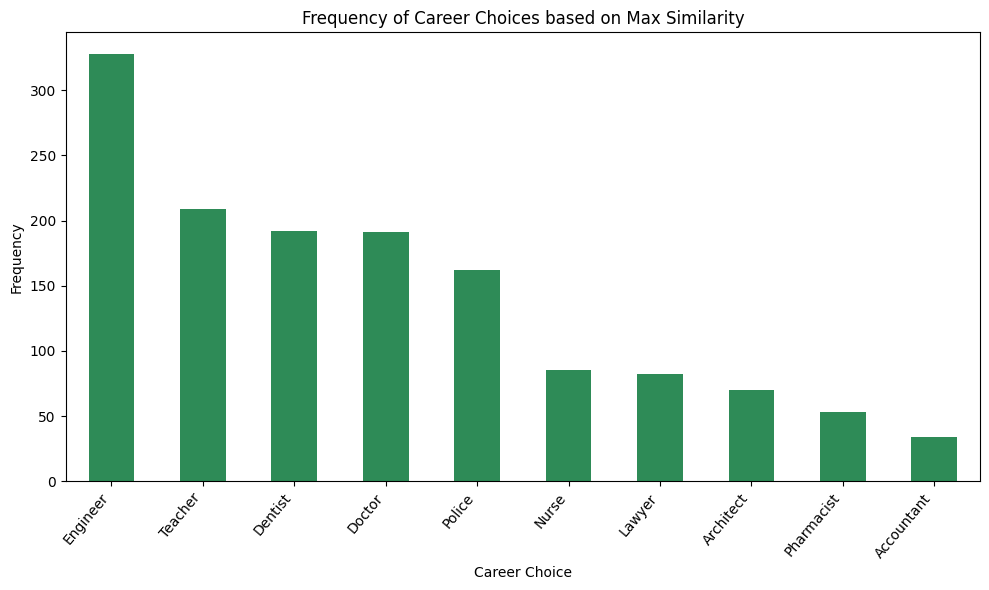

In [6]:
# Count the frequency of each career choice
career_frequency = TaskData['Max_Similarity_Column'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
career_frequency.plot(kind='bar', color='seagreen')
plt.title('Frequency of Career Choices based on Max Similarity')
plt.xlabel('Career Choice')
plt.ylabel('Frequency')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()


# Getting the required output files

In [7]:
new_df = TaskData[['PASSION', 'Max_Similarity_Column']]
new_df.to_csv('output.csv')
TaskData.to_csv('data.csv')


# Checking with .iloc

In [8]:
TaskData['Doctor'].iloc[1402]

50.0

In [9]:
TaskData['Teacher'].iloc[1402]

47.14045207910317